Import packages for the code to work.

In [1]:
#!pip install prettytable
import requests
import json
import prettytable
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#https://www.bls.gov/developers/api_python.htm

Here we are designating the files we want to download to use.
First step is understanding that the seriesID key is tied to the name of the files we want to download. Next we incldue the start and endyear for the data we want. All this information will be stored as the data variable, which will be included as part of our API request. The Json data will then be loaded as text as json_data variable. 

In [2]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['LEU0252916700','LEU0252917300','LEU0254929400','LEU0252918500'],"startyear":"2012", "endyear":"2022"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)
#print(json_data)

Here we are using a for loop to iterate though all the JSON file to gather our data and write it to a csv file. For every key value in a series we will assign it under the for item in series['data']: loop and write it to a CSV file. 

In [3]:
for series in json_data['Results']['series']:
    x=prettytable.PrettyTable(['series id',"year","period","periodName", "value","footnotes"])
    seriesId = series['seriesID']
    csv_file_path = seriesId + '.csv'
    
    with open(csv_file_path, mode='w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(['series id',"year","period","periodName", "value"])
        
        for item in series['data']:
            year = item['year']
            period = item['period']
            periodName = item['periodName']
            value = item['value']
            csv_writer.writerow([seriesId, year, period, periodName, value])
    print(f'Data saved as {csv_file_path}')

Data saved as LEU0252916700.csv
Data saved as LEU0252917300.csv
Data saved as LEU0254929400.csv
Data saved as LEU0252918500.csv


Load the data into data frames and testing to make sure it worked. Test to make sure data loaded into data frame with no issue.

In [4]:
df1 = pd.read_csv("LEU0252916700.csv") 
df2 = pd.read_csv("LEU0252917300.csv") 
df3 = pd.read_csv("LEU0254929400.csv") 
df4 = pd.read_csv("LEU0252918500.csv") 

In [5]:
df1.head()

,series id,year,period,periodName,value
0,LEU0252916700,2021,Q04,4th Quarter,651
1,LEU0252916700,2021,Q03,3rd Quarter,633
2,LEU0252916700,2021,Q02,2nd Quarter,620
3,LEU0252916700,2021,Q01,1st Quarter,613
4,LEU0252916700,2020,Q04,4th Quarter,608


We are changing the values of 'series ID' to accurately reflect the values we are looking at. The for loop itterate through the first column assigning a new value. 

In [6]:
for i in range (len(df1)):
    df1.loc[i,'series id'] = '<HS Diploma'
for i in range (len(df2)):
    df2.loc[i,'series id'] = 'HS Diploma'
for i in range (len(df3)):
    df3.loc[i,'series id'] = 'Some College'
for i in range (len(df4)):
    df4.loc[i,'series id'] = 'Bach+'

Here we are combining the data into one data frame containing all the data from the four files we downlaoded. We are also dropping a column that we have no use for. We are also changing the name of the columns to better represent the data those columns hold

In [7]:
payData = pd.concat([df1, df2,df3,df4], axis=0)
payData = payData.drop('periodName',axis=1)
payData.rename(columns = {'series id':'Education Level'}, inplace = True)
payData.rename(columns = {'value':'Pay per week'}, inplace = True)


In [8]:
payData.head()

,Education Level,year,period,Pay per week
0,<HS Diploma,2021,Q04,651
1,<HS Diploma,2021,Q03,633
2,<HS Diploma,2021,Q02,620
3,<HS Diploma,2021,Q01,613
4,<HS Diploma,2020,Q04,608


We originally planned on using histograms to display the frequncy that pay level was to Eduaction level. We realized that this was not the proper means to display what we wanted to convey, so we decided to use other types of charts. 
This code is left here to see what we originally tried.

#HISTOGRAM
plt.figure(figsize=(8, 6))
sns.histplot(payData['Pay per week'].where(payData['Education Level'] == '<HS Diploma') , bins=20, kde=True)
plt.ylabel('Weeks pay was: ')
plt.xlabel('Weekly Pay')
#plt.xlim(0,23)
plt.title('Distribution of Pay per week: <HS Diploma')
plt.show()

#HISTOGRAM
plt.figure(figsize=(8, 6))
sns.histplot(payData['Pay per week'].where(payData['Education Level'] == 'HS Diploma') , bins=20, kde=True)
plt.ylabel('Weeks pay was: ')
plt.xlabel('Weekly Pay')
#plt.xlim(0,23)
plt.title('Distribution of Pay per week: <HS Diploma')
plt.show()

#HISTOGRAM
plt.figure(figsize=(8, 6))
sns.histplot(payData['Pay per week'].where(payData['Education Level'] == 'Some College') , bins=20, kde=True)
plt.ylabel('Weeks pay was: ')
plt.xlabel('Weekly Pay')
#plt.xlim(0,23)
plt.title('Distribution of Pay per week: <HS Diploma')
plt.show()

#HISTOGRAM
plt.figure(figsize=(8, 6))
sns.histplot(payData['Pay per week'].where(payData['Education Level'] == 'Bach+') , bins=20, kde=True)
plt.ylabel('Weeks pay was: ')
plt.xlabel('Weekly Pay')
#plt.xlim(0,23)
plt.title('Distribution of Pay per week: <HS Diploma')
plt.show()

#HISTOGRAM
plt.figure(figsize=(8, 6))
sns.histplot(payData['Pay per week'] , bins=20, kde=True)
plt.ylabel('Weeks pay was: ')
plt.xlabel('Weekly Pay')
#plt.xlim(0,23)
plt.title('Distribution of Pay per week: Average Together')
plt.show()

Here we are using a function that takes 4 arguments to display a line plot of all the quarterly pay rates. The first is our data frame, a list containing our different education levels, y which column's value we want to use, and x which is to properly title our chart.

In [9]:
eduList = ['<HS Diploma','HS Diploma','Some College','Bach+']
def linePlotEdu(payData,eduList,y, x):
    eduLevel = payData[(payData['Education Level'].isin(eduList))]
    # Filter the data for the specific country
    sns.set_style('whitegrid')
    sns.set_theme(font_scale = 1.5)
    plt.figure(figsize=(10, 8))
    # Create a line plot for the happiness score over the years
    sns.lineplot(x='year', y=y, data=payData, hue='Education Level',linewidth=2,palette= 'turbo').set(title=f'{x} by year based on {eduList}')
    plt.show()

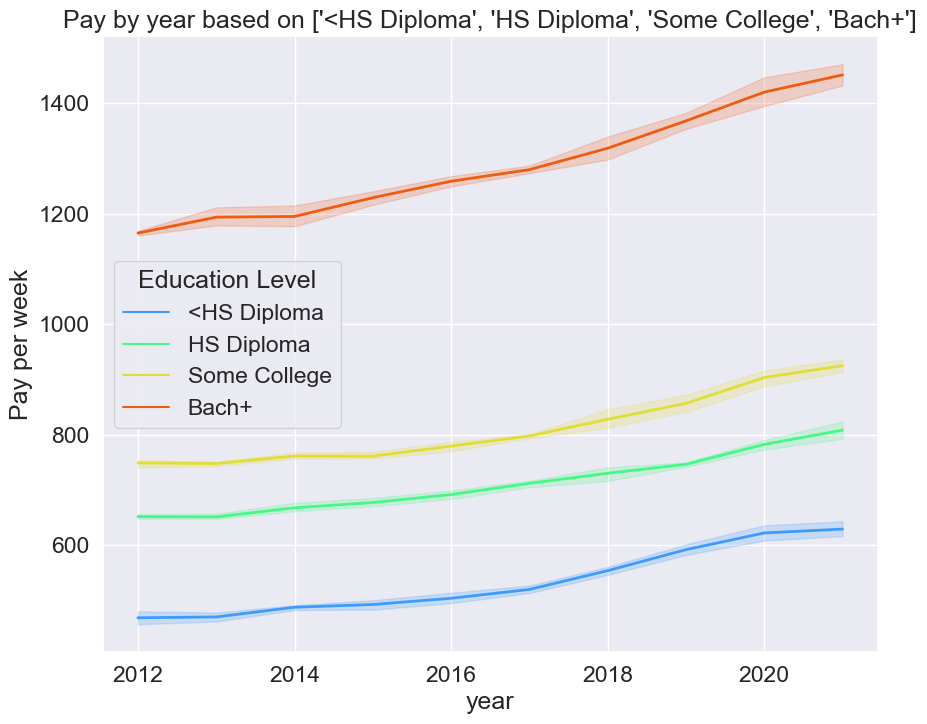

In [10]:
linePlotEdu(payData,eduList,'Pay per week','Pay')

In [11]:
df1 = payData

We originally used a seperate data frame because we were trying to create a time series plot, and wanted our year column as our index. We soon realized we were running into major issues and not progressing in getting our time series plot. 

In [12]:
#df1 = df1.set_index('year')

In [13]:
df1.head()

,Education Level,year,period,Pay per week
0,<HS Diploma,2021,Q04,651
1,<HS Diploma,2021,Q03,633
2,<HS Diploma,2021,Q02,620
3,<HS Diploma,2021,Q01,613
4,<HS Diploma,2020,Q04,608


THe code below is used to make our time series plot. The first thing we wanted to do is convert our period column into something readable for python.

We made a dictionary to hold our conversion strings. 
Then we pulled the year from the year column changing that into a string and concacting it to our converted quarter values. This new date column is now readable under pandas and convertered into the date value we can use for a time series plot. 
With this new date column, we could now set that as our index after sorting and put our data in order by earlist to latest date. 

The education list would hold our education levels, so that we can plot a time series plot for each individual education level. 

Now we can filter through the data in our for loop by creating a filtered data variable to hold only data for the specified education level.

   Education Level  year period  Pay per week     date
0      <HS Diploma  2021    Q04           651  2021-12
1      <HS Diploma  2021    Q03           633  2021-09
2      <HS Diploma  2021    Q02           620  2021-06
3      <HS Diploma  2021    Q01           613  2021-03
4      <HS Diploma  2020    Q04           608  2020-12
..             ...   ...    ...           ...      ...
35           Bach+  2013    Q01          1189  2013-03
36           Bach+  2012    Q04          1168  2012-12
37           Bach+  2012    Q03          1170  2012-09
38           Bach+  2012    Q02          1164  2012-06
39           Bach+  2012    Q01          1158  2012-03

[160 rows x 5 columns]


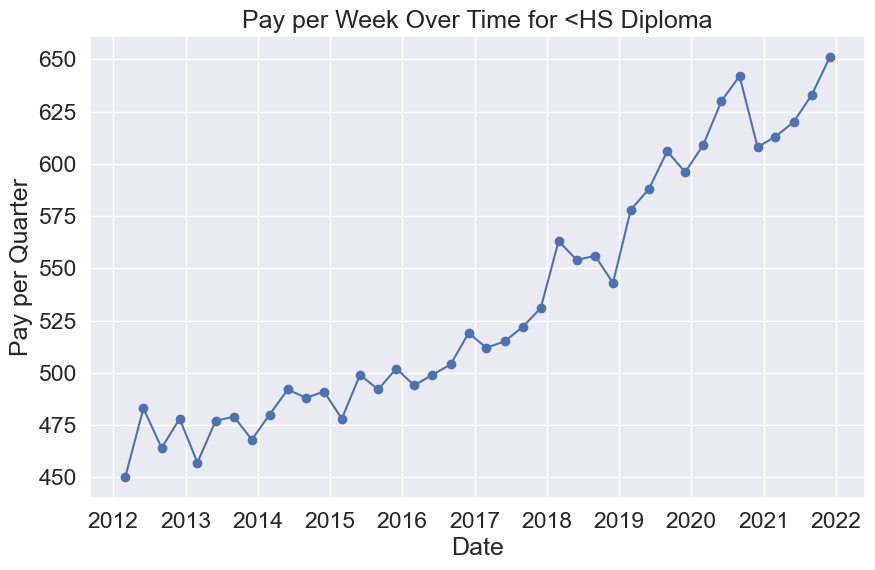

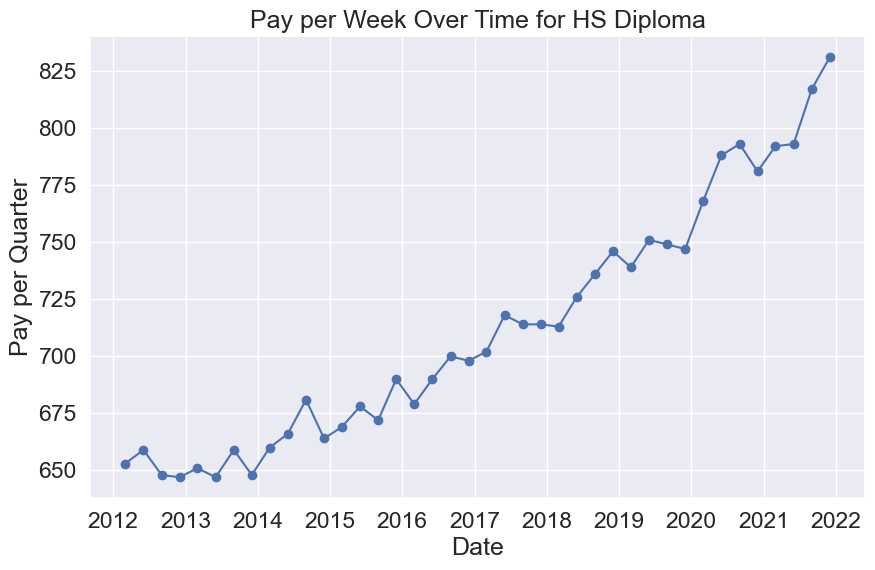

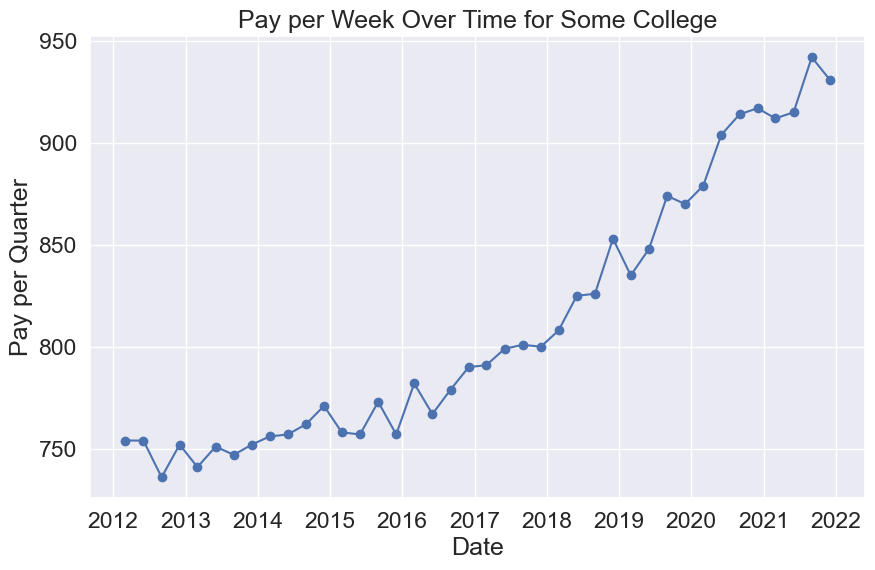

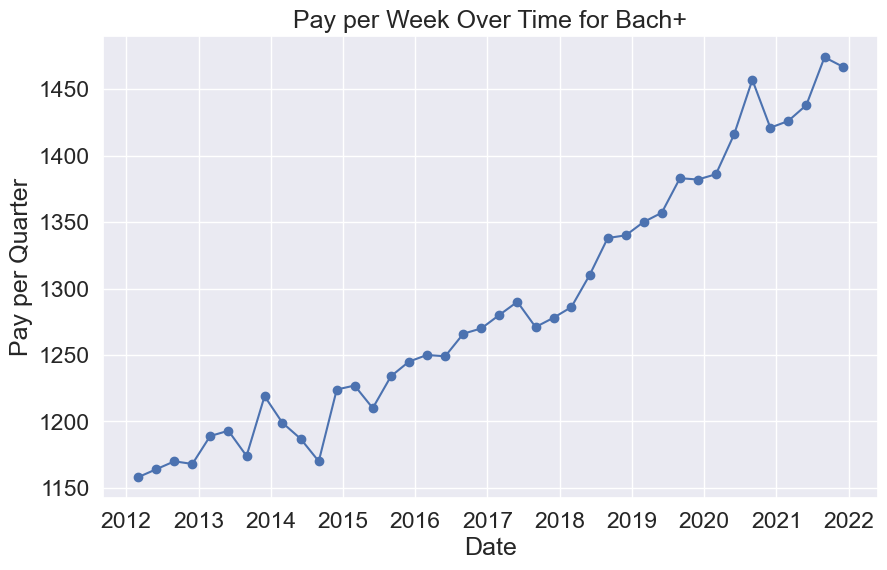

In [14]:
# Map 'period' to a valid month-year format
quarter_to_month = {'Q01': '03', 'Q02': '06', 'Q03': '09', 'Q04': '12'}
df1['date'] = df1['year'].astype(str) + '-' + df1['period'].map(quarter_to_month)
print(df1)
# Convert 'date' to datetime format
df1['date'] = pd.to_datetime(df1['date'])

# Set the datetime index and sort by it
df1.set_index('date', inplace=True)
df1.sort_index(inplace=True)

# List of education levels to filter
eduList = ['<HS Diploma', 'HS Diploma', 'Some College', 'Bach+']

# Loop through education levels and create time series plots
for edu_level in eduList:
    filtered_data = df1[df1['Education Level'] == edu_level]

    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data.index, filtered_data['Pay per week'], marker='o', linestyle='-')
    plt.title(f'Pay per Week Over Time for {edu_level}')
    plt.xlabel('Date')
    plt.ylabel('Pay per Quarter')
    plt.grid(True)
    plt.show()
